**Домашнее задание**

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
#airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv") # проанализирован на занятии
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
all_series = [
    ("Monthly sales of company X", sales_of_company_x["Count"]),
    ("Monthly Boston armed robberies", robberies_in_boston["Count"]),
#    ("International airline passengers monthly totals in thousands", airlines_passengers["Count"]),
    ("Mean monthly air temperature (Deg. F) Nottingham Castle", mean_monthly_temp["Deg"]),
    ("Weekly closings of the Dow-Jones industrial average", dowjones_closing["Close"]),
    ("Daily total female births in California", female_births["Count"])
]

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', title='Original'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        plt.show()
    return

1) Построим график "Monthly sales of company X", оценим тестом Дикки-Фулера и построим кореллограммы.

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
Lags Used                      12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/media/ilia/Vol3/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


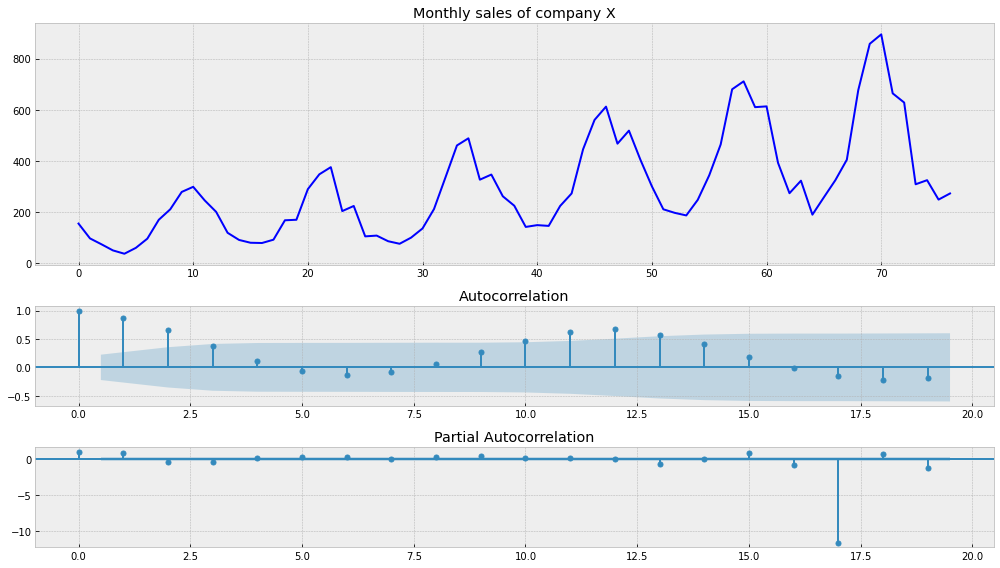

In [5]:
i = 0
title, series = all_series[i]
tsplot(series, title=title)

Как мы видим, и тест Дикки-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
Lags Used                      12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/media/ilia/Vol3/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


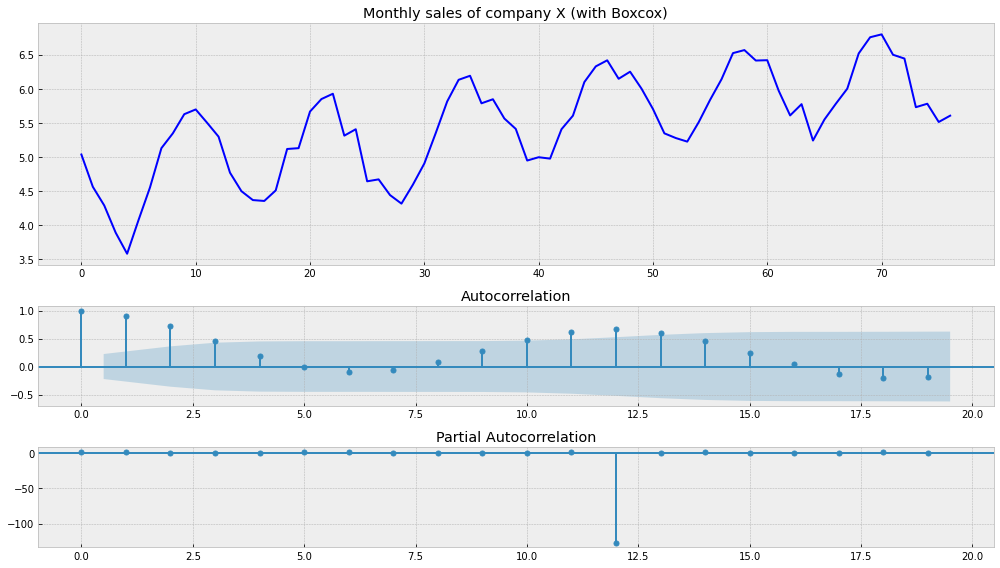

In [6]:
series = boxcox(series, 0)
tsplot(series, title=title + " (with Boxcox)")

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
Lags Used                      11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


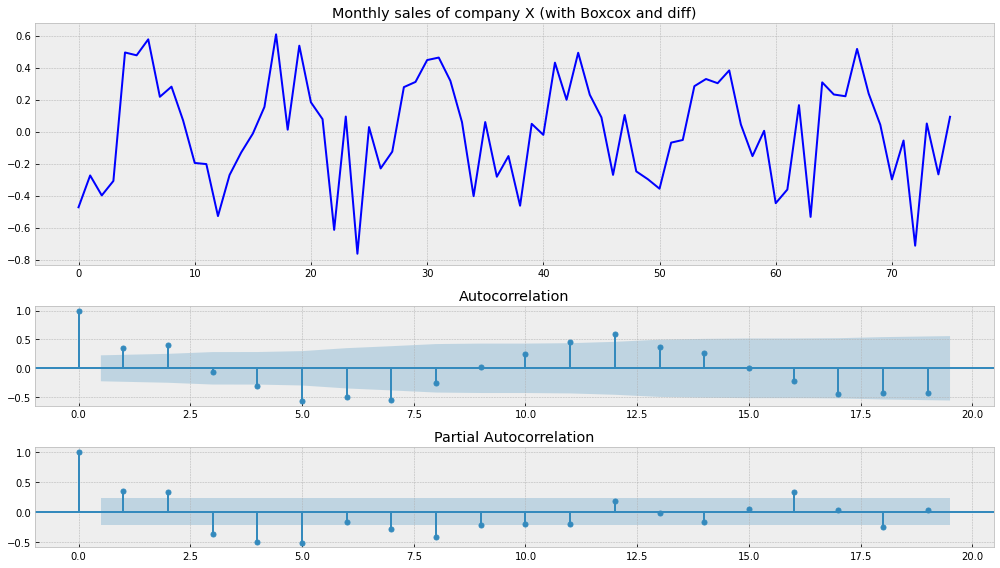

In [7]:
series = series[1:] - series[:-1]
tsplot(series, title=title + " (with Boxcox and diff)")

По кореллограмме трудно выделить период сезонности. p-value достаточно, чтобы отклонить гипотезу о нестационарности ряда. Однако, визульно кажется, что сезонность с периодом 12 всё же есть. Проверим. Попробуем убрать эту сезонность.

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
Lags Used                      10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


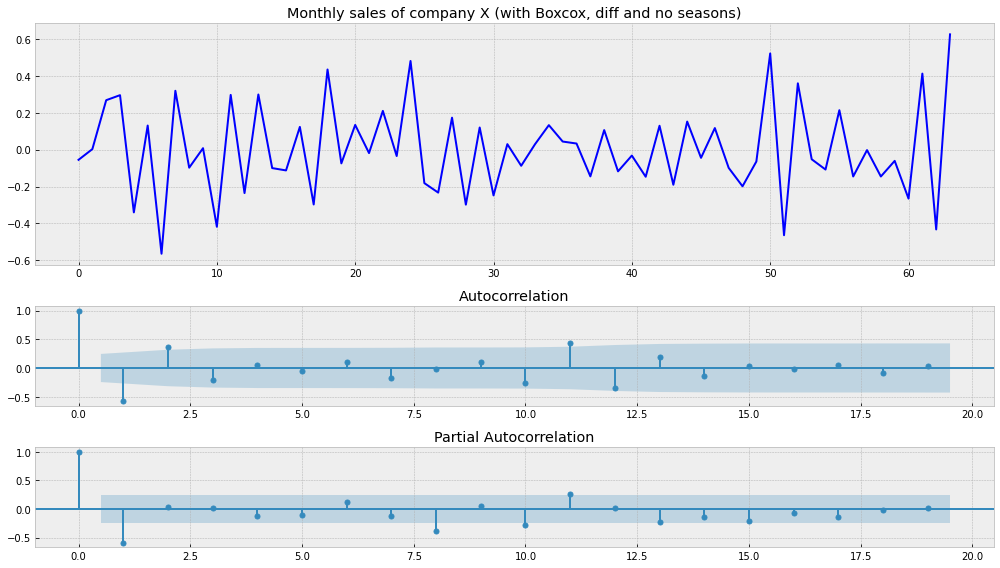

In [8]:
series = series[12:] - series[:-12]
tsplot(series, title=title + " (with Boxcox, diff and no seasons)")

Кореллограммы выглядят получше, да и на графике теперь не видна сезонность. Однако, тест Дикки-Фуллера показал более плохие результаты (p-value > 0.05), поэтому лучше остановиться на предыдущем результате.

2) Построим график "Monthly Boston armed robberies", оценим тестом Дикки-Фулера и построим кореллограммы.

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
Lags Used                       11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


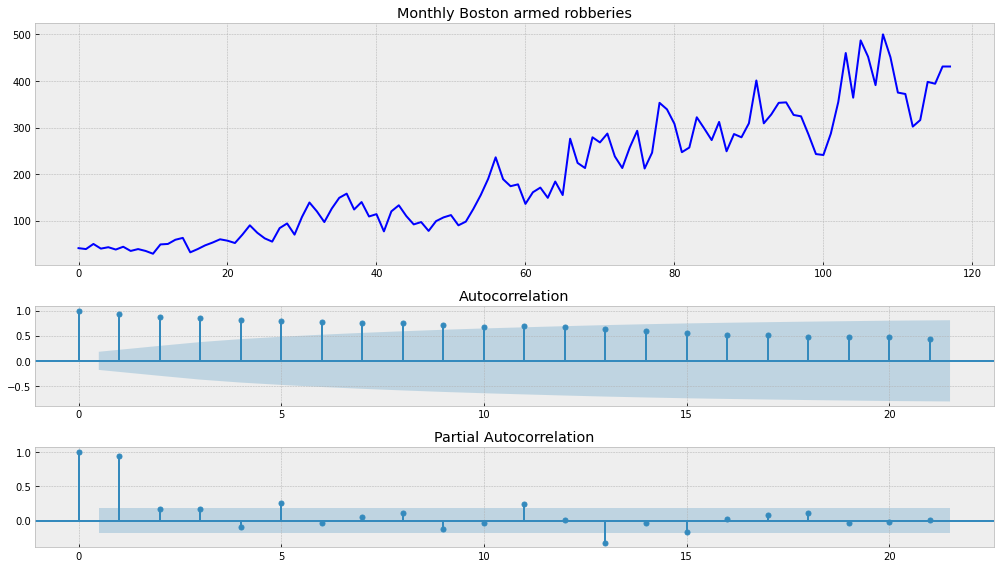

In [9]:
i = 1
title, series = all_series[i]
tsplot(series, title=title)

Как мы видим, и тест Дикки-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
Lags Used                       10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


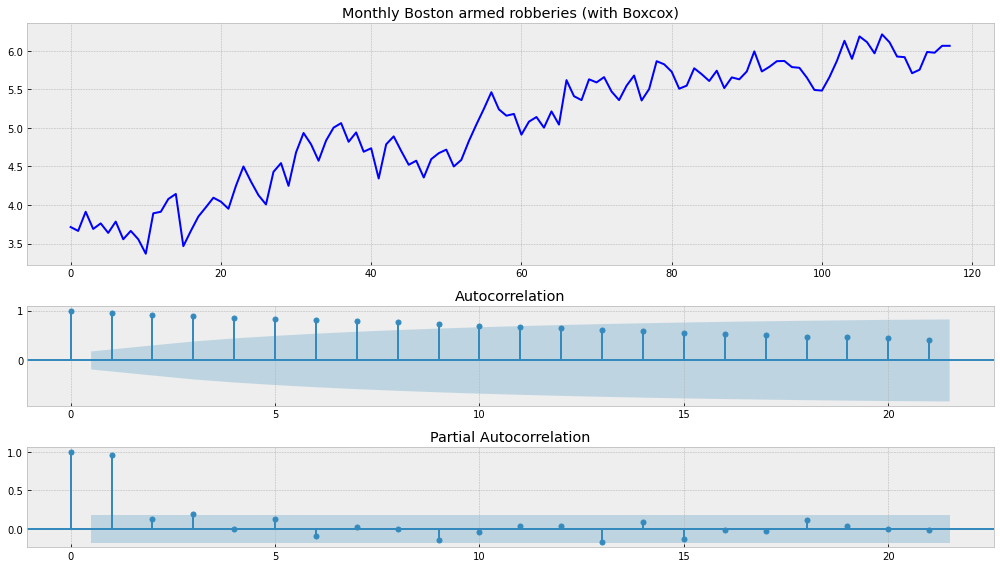

In [10]:
series = boxcox(series, 0)
tsplot(series, title=title + " (with Boxcox)")

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
Lags Used                      3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


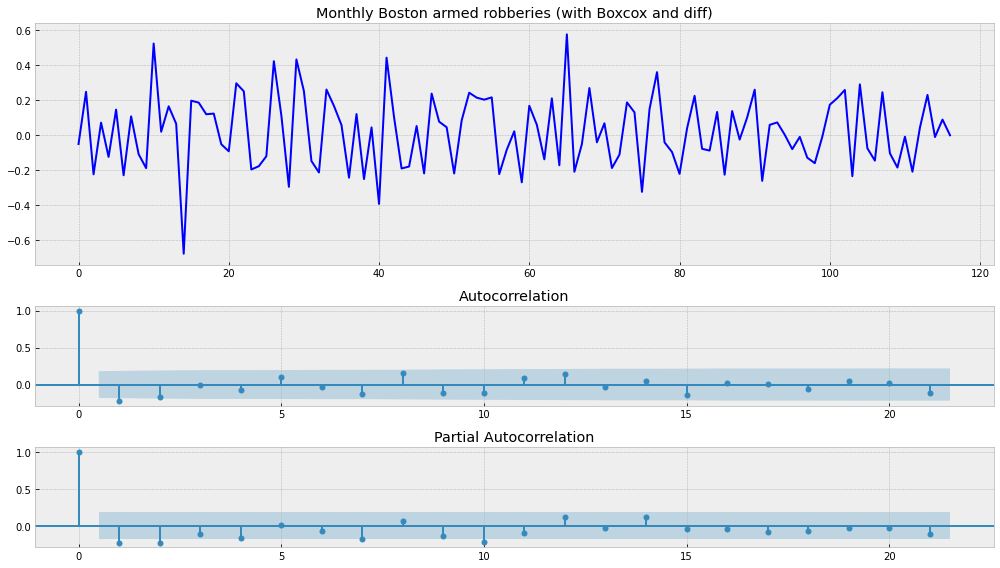

In [11]:
series = series[1:] - series[:-1]
tsplot(series, title=title + " (with Boxcox and diff)")

По кореллограмме и графику не видна сезонность. p-value с достаточной уверенностью позволяет отклонить гипотезу о нестационарности ряда.

3) Построим график "Mean monthly air temperature (Deg. F) Nottingham Castle", оценим тестом Дикки-Фулера и построим кореллограммы.

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
Lags Used                       14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


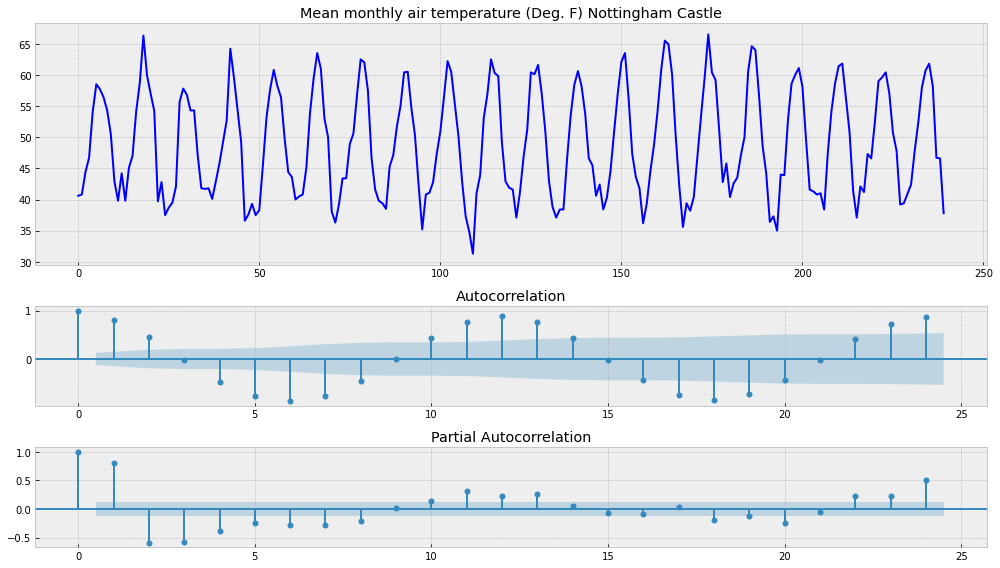

In [12]:
i = 2
title, series = all_series[i]
tsplot(series, title=title)

p-value достаточно, чтобы отклонить гипотезу о нестационарности ряда. Однако, визуально кажется, что сезонность есть. Попробуем убрать сезонность.

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
Lags Used                      1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


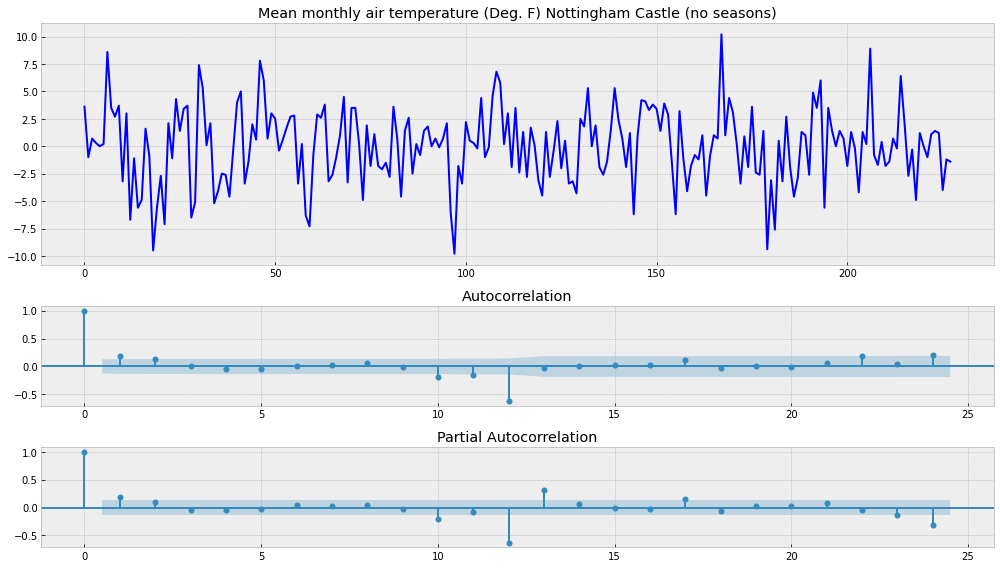

In [13]:
series = series.to_numpy()
series = series[12:] - series[:-12]
tsplot(series, title=title + " (no seasons)")

Вот теперь это выглядит лучше, и p-value позволяет отклонить гипотезу о нестационарности ряда.

4) Построим график "Weekly closings of the Dow-Jones industrial average", оценим тестом Дикки-Фулера и построим кореллограммы.

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
Lags Used                        0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


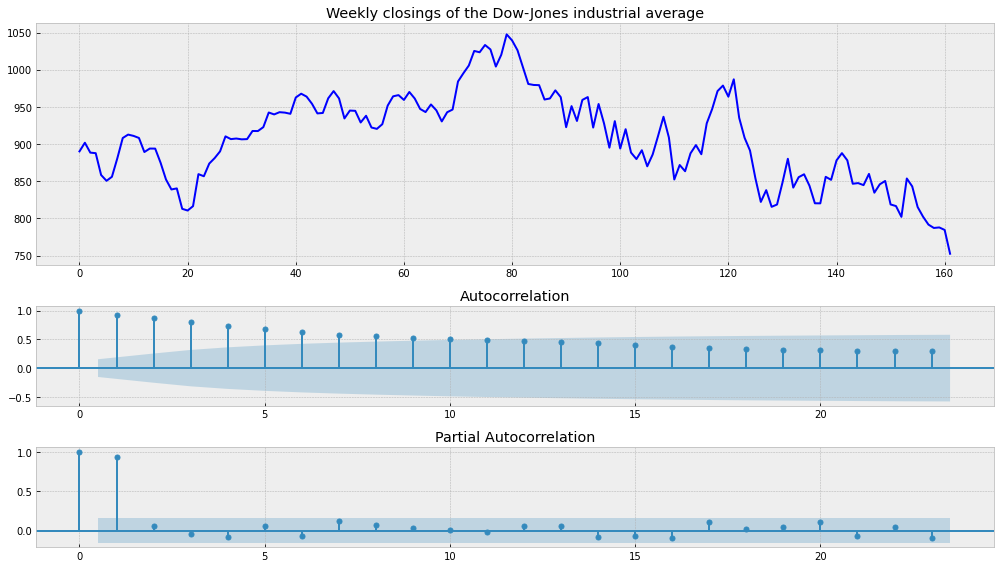

In [14]:
i = 3
title, series = all_series[i]
tsplot(series, title=title)

Как мы видим, и тест Дикки-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Сезонности не видно, попробуем продифференцировать ряд.

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
Lags Used                      0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


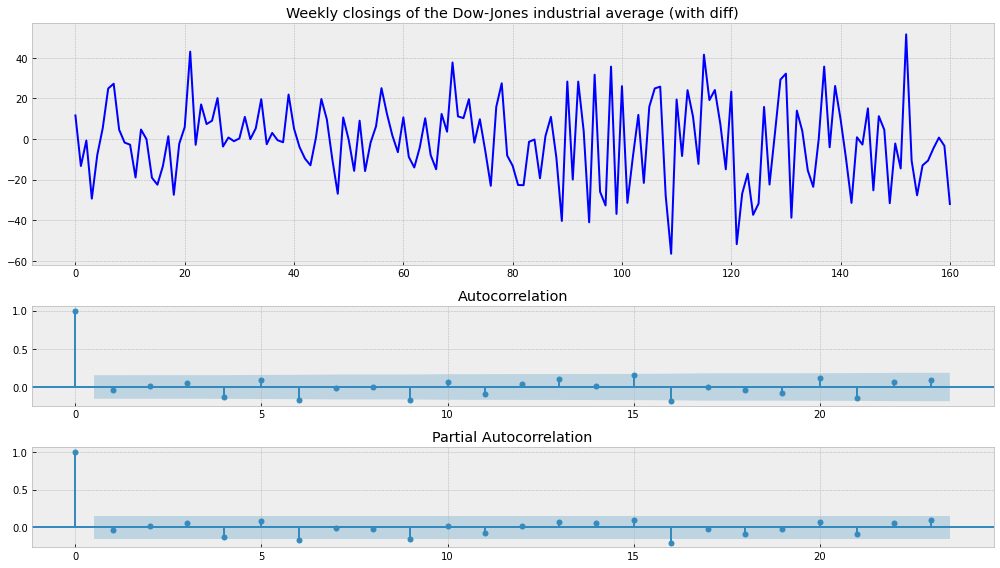

In [15]:
series = series.to_numpy()
series = series[1:] - series[:-1]
tsplot(series, title=title + " (with diff)")

По кореллограмме и графику видно, что сезонность не прослеживается. p-value позволяет с достаточной уверенностью отклонить гипотезу о нестационарности ряда.

5) Построим график "Daily total female births in California", оценим тестом Дикки-Фулера и построим кореллограммы.

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
Lags Used                        6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


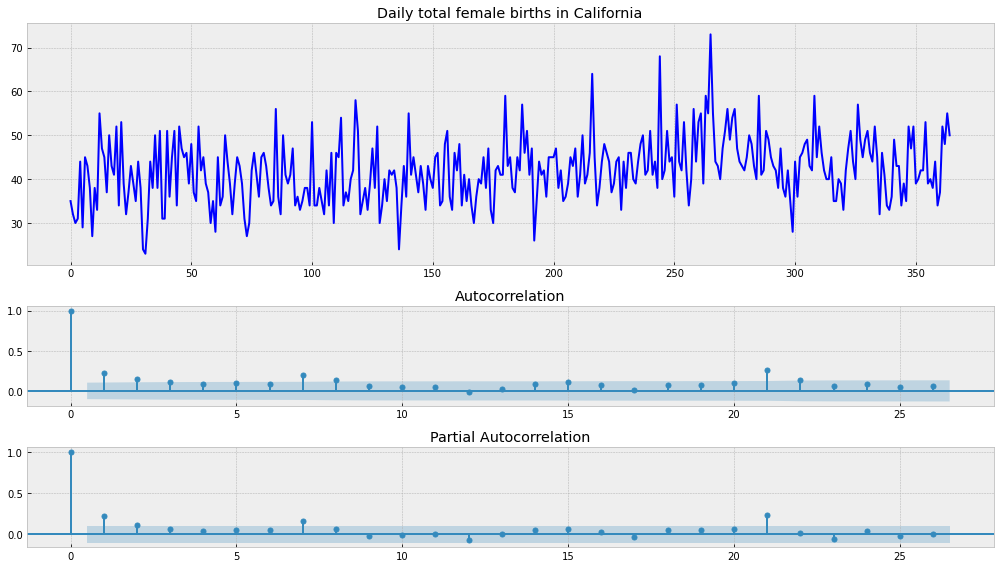

In [16]:
i = 4
title, series = all_series[i]
tsplot(series, title=title)

По кореллограмме и графику видно, что сезонность не прослеживается. p-value позволяет с достаточной уверенностью отклонить гипотезу о нестационарности ряда.